In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
 
import json 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
import re

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-pa

In [3]:
commentData = pd.read_csv('P7_01_0_training.1600.processed.noemoticon.csv', encoding='ISO-8859-1')

In [4]:
commentData

,target,id,date,flag,user,text
0,4,1467882425,Mon Apr 06 22:38:36 PDT 2009,NO_QUERY,Julia_xxoo,tafe quiz then PHOTOSHOOT with my sezdawg
1,4,1467937329,Mon Apr 06 22:53:54 PDT 2009,NO_QUERY,DeenaWilliams,"@RyanStar Hey Ryan, just thought I'd say that..."
2,4,1468007072,Mon Apr 06 23:13:41 PDT 2009,NO_QUERY,pluggdin,@KesavaReddy mba is good for learning tools/t...
3,4,1468145953,Mon Apr 06 23:58:07 PDT 2009,NO_QUERY,InYourEyes2410,@tommcfly haha morning then. i think (aussie h...
4,4,1468407270,Tue Apr 07 01:28:50 PDT 2009,NO_QUERY,Anjuli_nz,@Azlemed thats good
...,...,...,...,...,...,...
1595,0,2326752569,Thu Jun 25 07:27:54 PDT 2009,NO_QUERY,chrissymassey,i'm so tired!
1596,0,2327023853,Thu Jun 25 07:49:13 PDT 2009,NO_QUERY,brandedyouth,@ispeed72 I hear ya!
1597,0,2327447537,Thu Jun 25 08:21:32 PDT 2009,NO_QUERY,TA_Mobile,Almost of ICsid changed ... No more simple pro...
1598,0,2328250549,Thu Jun 25 09:21:07 PDT 2009,NO_QUERY,Omkaaraa,nobody joined my followers list today ..


In [5]:
df = commentData

In [6]:
train_df = df.drop(["id","date","flag","flag","user"], axis=1)
train_df = train_df.rename(columns={"target": "Sentiment"})
train_df

,Sentiment,text
0,4,tafe quiz then PHOTOSHOOT with my sezdawg
1,4,"@RyanStar Hey Ryan, just thought I'd say that..."
2,4,@KesavaReddy mba is good for learning tools/t...
3,4,@tommcfly haha morning then. i think (aussie h...
4,4,@Azlemed thats good
...,...,...
1595,0,i'm so tired!
1596,0,@ispeed72 I hear ya!
1597,0,Almost of ICsid changed ... No more simple pro...
1598,0,nobody joined my followers list today ..


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl  

In [8]:
train_df['Length'] = train_df['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

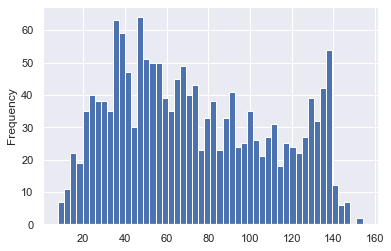

In [9]:
train_df['Length'].plot(kind = 'hist' , bins = 50) 

Text(0.5, 0.98, 'Length via each Sentiment')

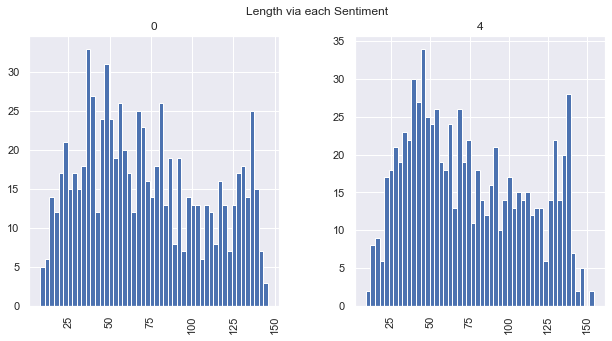

In [10]:
ax = train_df.hist(column = 'Length', by = 'Sentiment', bins = 50 , figsize = (10,5));
pl.suptitle('Length via each Sentiment') 

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re 
stemming = PorterStemmer()
Lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words("english"))
stops2 = set(stopwords.words("french"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:

def clean_str(x):
    
    x = str(x)
   
    # Convert to lower case
    text = x.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
    
    # Stemming
    #stemmed_words = [stemming.stem(w) for w in token_words]

    # lemmatizer    
    lemmatizer_words = [Lemmatizer.lemmatize(w) for w in token_words]
    
    # Remove stop words
    meaningful_words = [w for w in token_words if not w in stops]
    
    # Remove stop words
    meaningful_words2 = [w for w in meaningful_words if not w in stops2]   
    
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words2))

    
    # Return cleaned data
    return joined_words


train_df['text'] = train_df['text'].apply(clean_str)

In [13]:
train_df

,Sentiment,text,Length
0,4,tafe quiz photoshoot sezdawg,42
1,4,ryanstar hey ryan thought say u put great show...,131
2,4,kesavareddy mba good learning one start taking...,110
3,4,tommcfly haha morning think aussie wheat bix h...,98
4,4,azlemed thats good,20
...,...,...,...
1595,0,tired,14
1596,0,hear ya,21
1597,0,almost icsid changed simple programmers,55
1598,0,nobody joined followers list today,41


In [14]:
print(train_df)

      Sentiment                                               text  Length
0             4                       tafe quiz photoshoot sezdawg      42
1             4  ryanstar hey ryan thought say u put great show...     131
2             4  kesavareddy mba good learning one start taking...     110
3             4  tommcfly haha morning think aussie wheat bix h...      98
4             4                                 azlemed thats good      20
...         ...                                                ...     ...
1595          0                                              tired      14
1596          0                                            hear ya      21
1597          0            almost icsid changed simple programmers      55
1598          0                 nobody joined followers list today      41
1599          0                                       think either      36

[1600 rows x 3 columns]


In [15]:
df = train_df
df

,Sentiment,text,Length
0,4,tafe quiz photoshoot sezdawg,42
1,4,ryanstar hey ryan thought say u put great show...,131
2,4,kesavareddy mba good learning one start taking...,110
3,4,tommcfly haha morning think aussie wheat bix h...,98
4,4,azlemed thats good,20
...,...,...,...
1595,0,tired,14
1596,0,hear ya,21
1597,0,almost icsid changed simple programmers,55
1598,0,nobody joined followers list today,41


In [16]:
df_0 = df[df['Sentiment'] == 0].sample(frac=1)
df_4 = df[df['Sentiment'] == 4].sample(frac=1)

# we want a balanced set for training against - there are 7072 `0` examples
sample_size = min(len(df_0), len(df_4))

data = pd.concat([df_0.head(sample_size), df_4.head(sample_size)]).sample(frac=1)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

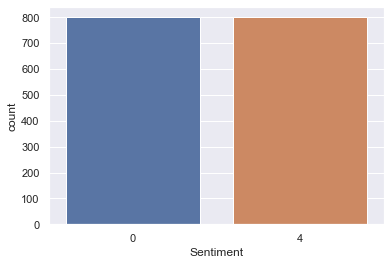

In [17]:
import seaborn as sns

sns.countplot(x='Sentiment', data=data)

In [18]:
sentences = data['text']

In [19]:
sentences[0]

'tafe quiz photoshoot sezdawg'

In [20]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(sentences)
sequence = tokenizer.texts_to_sequences(sentences)

In [21]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

4412


In [22]:
embed_num_dims = 100
max_seq_len = 1000

In [23]:
padded_seq = pad_sequences(sequence , maxlen = max_seq_len )

In [24]:
padded_seq

array([[   0,    0,    0, ..., 1293,  246,  246],
       [   0,    0,    0, ..., 1300,  435,    5],
       [   0,    0,    0, ...,  436,  787, 1302],
       ...,
       [   0,    0,    0, ...,  786,   27,   41],
       [   0,    0,    0, ...,  246,   54,  877],
       [   0,    0,    0, ...,   75,  271,  399]])

In [25]:
Y = pd.get_dummies(data['Sentiment']).values

In [26]:
Y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [27]:
from keras.utils import to_categorical


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,Y ,train_size = 0.55)

In [29]:
Y_train.shape

(880, 2)

## Word2Vec 

In [30]:
import string
import gensim

Comments_lines = list()
lines = data['text'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    
    #remove punctuation from each word
    table =  str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #remove remaining tpkens gthat are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    Comments_lines.append(words)


len(Comments_lines)

1600

In [31]:
#train word2vec mode
embedding_dims = 128 #embedding vector output dimension 
max_len = 200 #Max. number of words per toxic comment to be use
word2VecModel = gensim.models.Word2Vec(sentences=Comments_lines, size= embedding_dims, window=5, workers=4, min_count=1)
#vocab size
wors = list(word2VecModel.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 9


In [32]:
#save model
filename = 'P7_03_7_embedding_word2vec.txt'
word2VecModel.wv.save_word2vec_format(filename, binary=False)

In [33]:
word2Vec_embeddings_index = {}
word2vec_file = open('P7_03_7_embedding_word2vec.txt', encoding = "utf-8")

for line in word2vec_file:
    values = line.split()
    word = values[0]
    coefficient = np.asarray(values[1:])
    word2Vec_embeddings_index[word] = coefficient
word2vec_file.close()

In [34]:
#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(Comments_lines)
sequences = tokenizer_obj.texts_to_sequences(Comments_lines)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

Comments_pad = pad_sequences(sequences, maxlen=max_len)
comments_tag =  pd.get_dummies(data['Sentiment']).values
print('Shape of toxic comments tensor', Comments_pad.shape)
print('Shape of comment tensor', comments_tag.shape)

Found 4412 uniquue tokens.
Shape of toxic comments tensor (1600, 200)
Shape of comment tensor (1600, 2)


In [35]:
num_words = len(word_index)+1
word2Vec_embedding_matrix = np.zeros((num_words, embedding_dims))

for word, i  in word_index.items():
    if i > num_words:
        continue
    word2Vec_embedding_vector = word2Vec_embeddings_index.get(word)
    if word2Vec_embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        word2Vec_embedding_matrix[i] = word2Vec_embedding_vector

print(num_words)
print(word2Vec_embedding_matrix.shape[0])
print(word2Vec_embedding_matrix.shape[1])

4413
4413
128


In [36]:
# For custom metrics
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)


import plotly




from keras.callbacks import EarlyStopping 

In [37]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [38]:
f = open('P7_03_7_embedding_word2vec.txt', encoding="utf8")
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))

Found 4413 word vectors.


In [39]:
embedd_index['bad']

array([-3.42875720e-04, -3.64928410e-03, -4.38258300e-03, -1.50760430e-03,
       -2.26525000e-03,  1.34946740e-03, -1.32499040e-03,  2.96522980e-04,
        2.74894000e-03, -2.97400520e-04,  5.06558500e-04,  4.86645900e-03,
        4.80103400e-03, -7.70636900e-04, -1.32895020e-03, -1.35698980e-03,
        3.54940440e-03,  2.36803180e-03, -2.09217770e-03, -2.96027960e-03,
       -3.07042500e-03,  3.61222030e-03, -4.49638700e-03, -2.79214930e-03,
       -1.44257820e-03,  1.89853180e-03,  3.04299570e-03,  3.61846850e-03,
        6.30629660e-04, -2.93069430e-03, -2.04671480e-03, -1.00840770e-03,
       -1.62360820e-03,  2.57668000e-04,  2.37758780e-03, -6.84202240e-04,
        6.00972400e-04,  1.15082760e-03, -1.80885870e-03,  2.25987430e-03,
       -5.24351800e-05, -2.92557600e-03,  3.51190730e-03,  1.84029990e-03,
        4.18571240e-03,  1.27933310e-03, -2.67478240e-03, -1.82330470e-03,
        1.12273770e-03,  2.02664780e-03, -6.90525400e-04,  2.84372200e-04,
       -2.77312400e-03,  

In [40]:
embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedd_index.get(word)
    if temp is not None:
        word2Vec_embedding_matrix[i] = temp
        
#for plotting
        tokens.append(word2Vec_embedding_matrix[i])
        labels.append(word)

(200, 2)


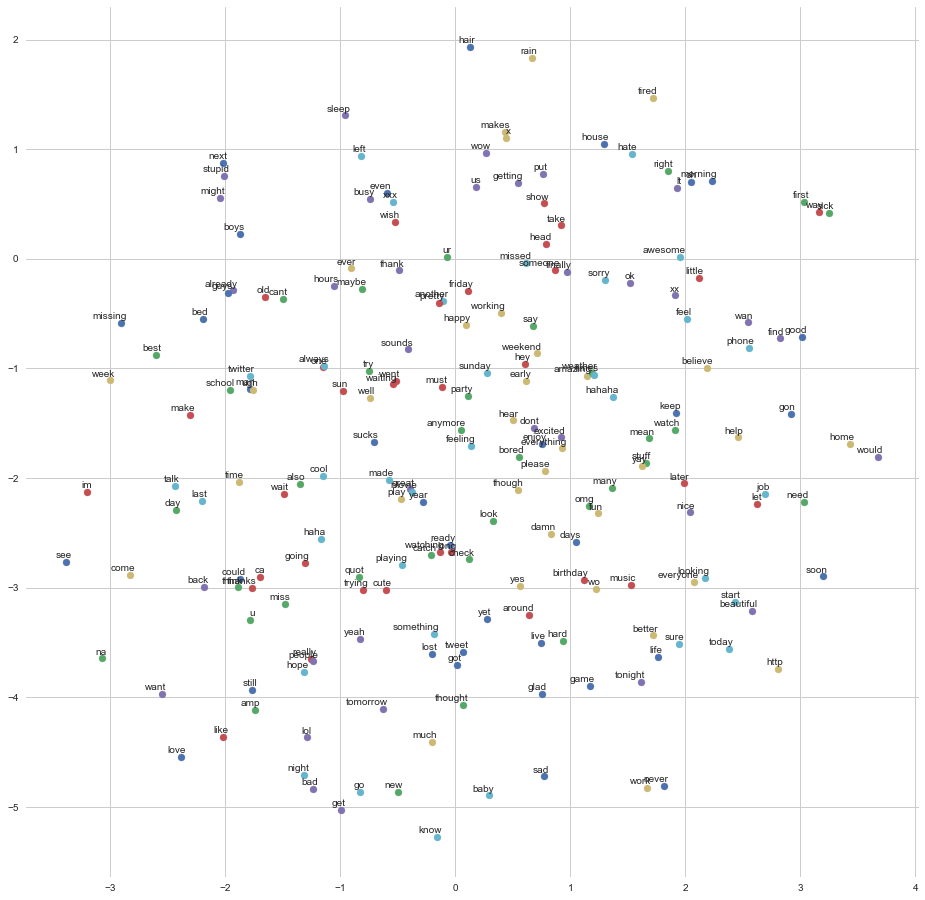

In [41]:
from sklearn.manifold import TSNE
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne()

In [42]:
#Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(len(index_of_words) + 1 , embed_num_dims , input_length = max_seq_len , weights = [embedding_matrix])

## Bidirectional LSTM with Word2Vec

In [43]:
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(30 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'sigmoid'))

In [44]:
from keras.optimizers import Adam
add = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy' , optimizer = add , metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         441300    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1000, 60)          31440     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 62        
Total params: 474,632
Trainable params: 474,632
Non-trainable params: 0
________________________________________________

In [46]:
Bil_LSTM_Word2Vec_model_fit = model.fit(X_train,Y_train, batch_size=100, epochs=5, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 880 samples, validate on 720 samples
Epoch 1/5
880/880 [==============================] - 11s 12ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4958
Epoch 2/5
880/880 [==============================] - 11s 12ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4958
Epoch 3/5
880/880 [==============================] - 11s 13ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4958
Epoch 4/5
880/880 [==============================] - 12s 13ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.4958
Epoch 5/5
880/880 [==============================] - 12s 13ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.4958


In [47]:
#train
Bil_LSTM_Word2Vec_train_score = model.evaluate(X_train,Y_train, batch_size=100, verbose=1)
print('Train Loss:', Bil_LSTM_Word2Vec_train_score[0])
print('Train Accuracy:', Bil_LSTM_Word2Vec_train_score[1])

#test
Bil_LSTM_Word2Vec_test_score = model.evaluate(X_test,Y_test, batch_size=100, verbose=1)
print('Test Loss:', Bil_LSTM_Word2Vec_test_score[0])
print('Test Accuracy:', Bil_LSTM_Word2Vec_test_score[1])

880/880 [==============================] - 2s 3ms/step
Train Loss: 0.6931277919899334
Train Accuracy: 0.5034090876579285
720/720 [==============================] - 2s 3ms/step
Test Loss: 0.6932730608516269
Test Accuracy: 0.4958333373069763


In [48]:
result2 = model.evaluate(X_test,Y_test, verbose=0)
print("Accuracy: %.2f%%" % (result2[1] * 100))

Accuracy: 49.58%


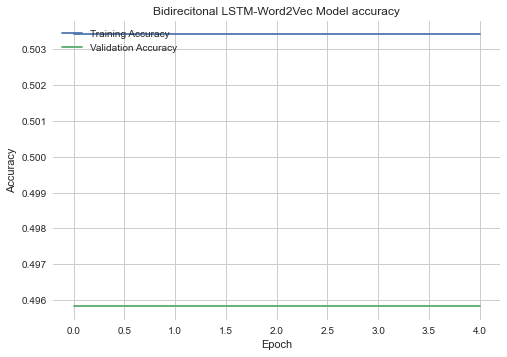

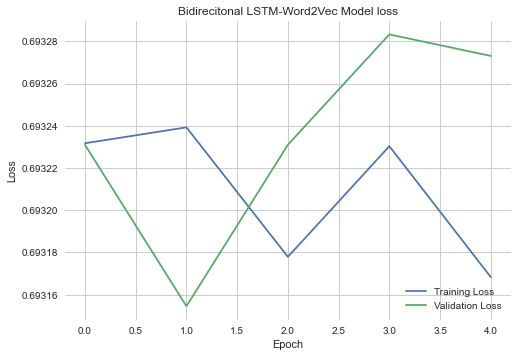

In [49]:
# Plot training & validation accuracy values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_accuracy'])
plt.title('Bidirecitonal LSTM-Word2Vec Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['loss'])
plt.plot(Bil_LSTM_Word2Vec_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-Word2Vec Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()